## Prepare for Modelling 

Preprocess data for simple modelling 

In [ ]:
# Import libaraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load data
df_electro = pd.read_excel('../Data/Electro_data_WT_KO_21112025.xlsx', index_col=0)

In [20]:
df_electro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2023_03_15_Cell2 to 2025_04_01_C7
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genotype              157 non-null    object 
 1   AP Threshold (mV)     153 non-null    object 
 2   AP amplitude (mV)     154 non-null    object 
 3   AP half-width (ms)    154 non-null    object 
 4   AP max rise (mV/ms)   154 non-null    object 
 5   AP max decay (mV/ms)  154 non-null    object 
 6   AP IS peak (mV/ms2)   146 non-null    object 
 7   AP SD peak (mV/ms2)   152 non-null    float64
 8   AHP (mV)              153 non-null    object 
 9   AHP latency (ms)      154 non-null    object 
 10  ISIavg (s)            142 non-null    object 
 11  SD ISI                135 non-null    object 
 12  CV ISI (%)            145 non-null    object 
 13  Sag amplitude (mV)    155 non-null    float64
 14  Rebound delay (ms)    145 non-null    object 
dtypes: 

In [88]:
# Clean dataset 
drop_cols = ['AP Threshold (mV)', 'AP half-width (ms)', 'AP IS peak (mV/ms2)', 
             'AHP (mV)', 'SD ISI', 'CV ISI (%)', 
             'Sag amplitude (mV)', 'Rebound delay (ms)']

df_electro_clean = df_electro.drop(columns=drop_cols)

In [89]:
# Fix datatype 
cols_to_convert = df_electro_clean.columns.difference(['Genotype'])
df_electro_clean[cols_to_convert] = df_electro_clean[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [90]:
df_electro_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2023_03_15_Cell2 to 2025_04_01_C7
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genotype              157 non-null    object 
 1   AP amplitude (mV)     153 non-null    float64
 2   AP max rise (mV/ms)   153 non-null    float64
 3   AP max decay (mV/ms)  153 non-null    float64
 4   AP SD peak (mV/ms2)   152 non-null    float64
 5   AHP latency (ms)      153 non-null    float64
 6   ISIavg (s)            133 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.1+ KB


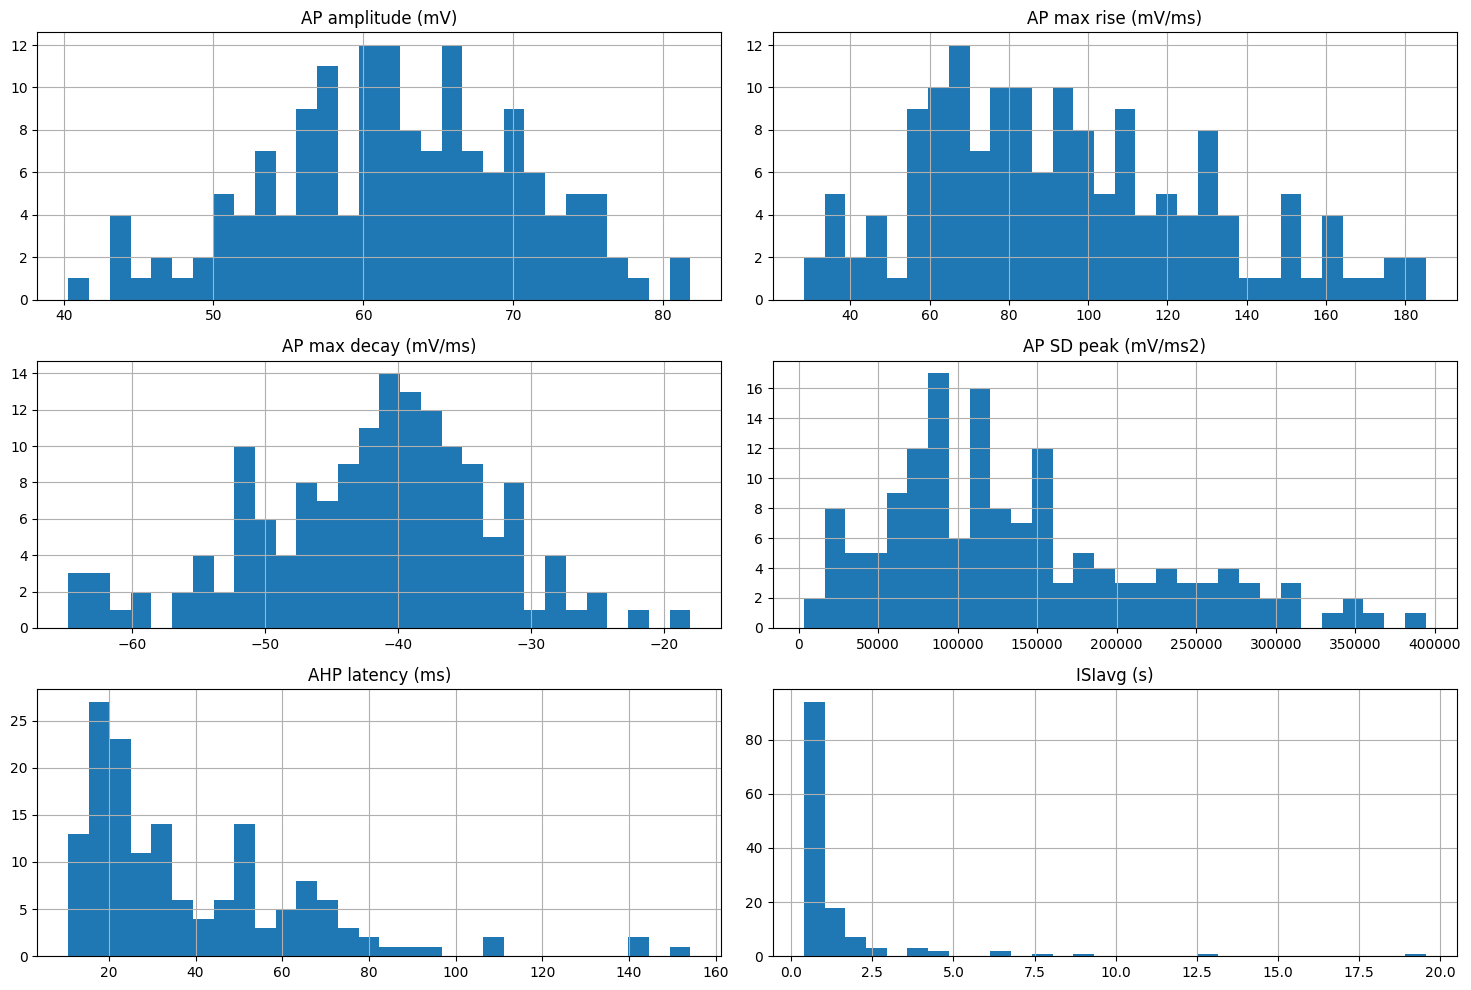

In [91]:
# Check distribution
df_electro_clean.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [92]:
# Use SimpleImputer to fill missing values
numeric_cols = df_electro_clean.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df_electro_clean[numeric_cols] = imputer.fit_transform(df_electro_clean[numeric_cols])

In [93]:
# Normalize SD Peak 
df_electro_clean['AP SD peak (mV/ms2) [normalized]'] = df_electro_clean['AP SD peak (mV/ms2)'] / 10000
df_electro_clean = df_electro_clean.drop(columns=['AP SD peak (mV/ms2)'])

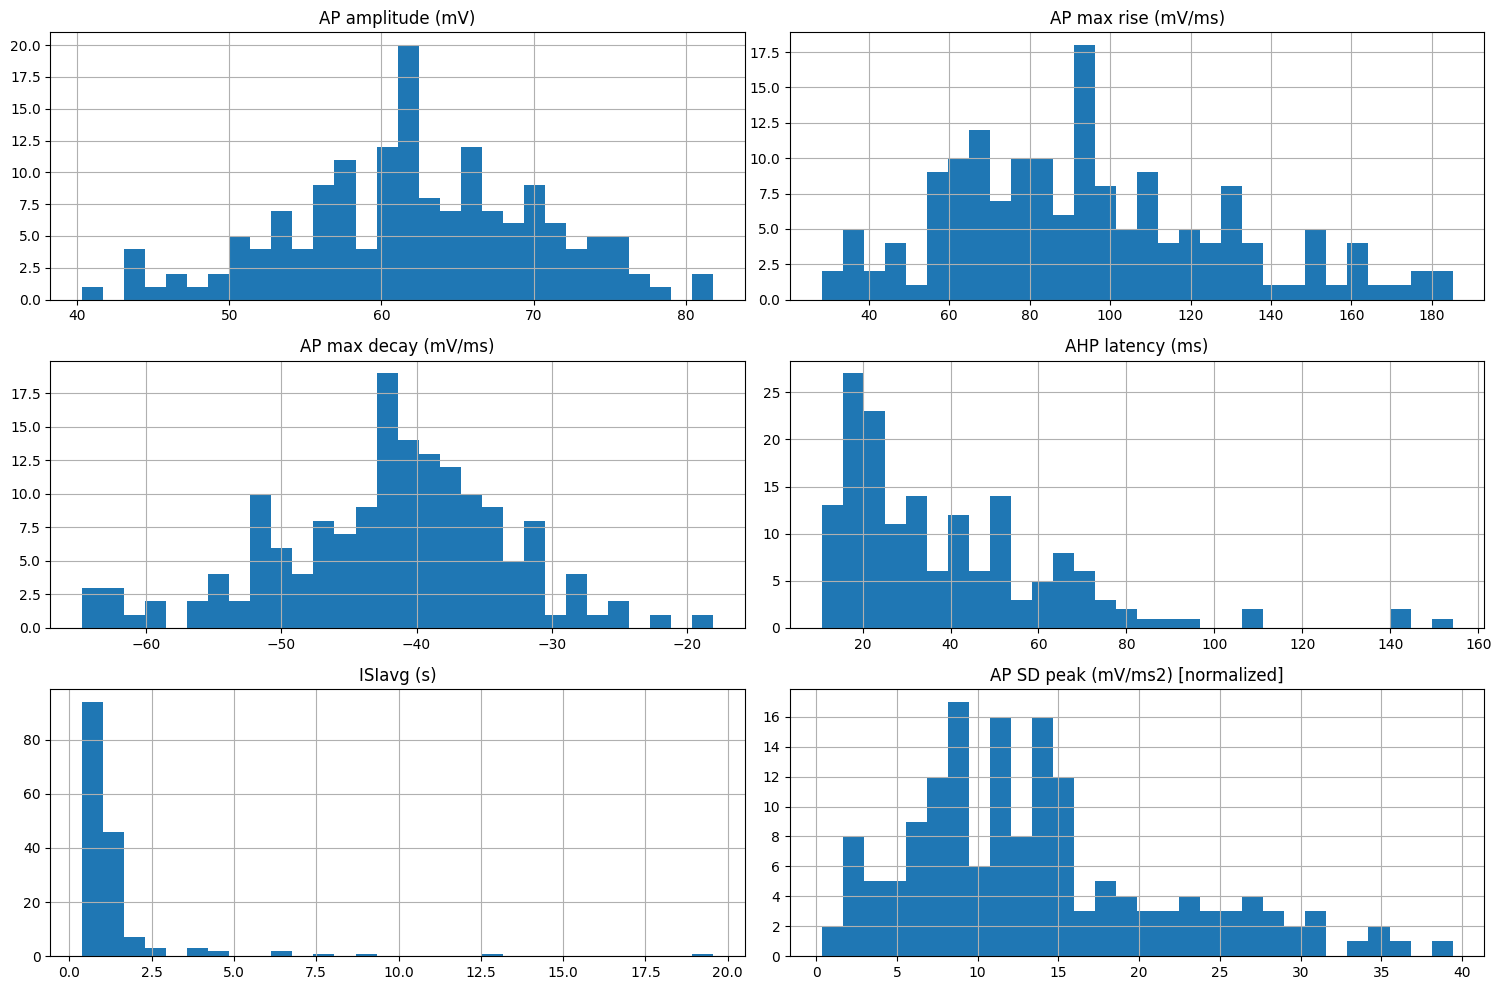

In [94]:
# Recheck distribution
df_electro_clean.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [95]:
df_electro_clean

,Genotype,AP amplitude (mV),AP max rise (mV/ms),AP max decay (mV/ms),AHP latency (ms),ISIavg (s),AP SD peak (mV/ms2) [normalized]
Neuron ID,,,,,,,
2023_03_15_Cell2,WT,49.353998,46.121109,-28.213343,33.525002,1.412655,2.219
2023_03_16_Cell1,WT,63.710302,95.216259,-35.265140,51.625000,0.450000,11.597
2023_03_16_Cell2,WT,65.617502,102.064706,-43.596663,33.474998,0.489000,13.351
2023_03_16_Cell5,WT,53.051099,54.730751,-31.987254,30.525002,1.748000,5.360
2023_03_16_Cell6,WT,70.165701,127.329260,-48.958346,17.974998,0.814000,23.357
...,...,...,...,...,...,...,...
2025_04_01_C1,Nav1.2 KO,60.625501,64.987391,-34.997333,78.875000,1.255000,8.192
2025_04_01_C4,Nav1.2 KO,56.187801,57.971127,-34.113519,76.574997,0.885000,7.942
2025_04_01_C5,Nav1.2 KO,62.309001,62.730692,-36.345169,51.525002,0.726000,8.567


In [96]:
num_WT = df_electro_clean[df_electro_clean['Genotype'] == 'WT'].shape[0]
num_KO = df_electro_clean[df_electro_clean['Genotype'] == 'Nav1.2 KO'].shape[0]

print(df_electro_clean.shape)
print(f'Number of WT neurons: {num_WT}')
print(f'Number of KO neurons: {num_KO}')
print(df_electro_clean.info())

(161, 7)
Number of WT neurons: 101
Number of KO neurons: 56
<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2023_03_15_Cell2 to 2025_04_01_C7
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Genotype                          157 non-null    object 
 1   AP amplitude (mV)                 161 non-null    float64
 2   AP max rise (mV/ms)               161 non-null    float64
 3   AP max decay (mV/ms)              161 non-null    float64
 4   AHP latency (ms)                  161 non-null    float64
 5   ISIavg (s)                        161 non-null    float64
 6   AP SD peak (mV/ms2) [normalized]  161 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.1+ KB
None


In [97]:
# Drop columns where Genotype is NaN
df_electro_clean = df_electro_clean.dropna(subset=['Genotype'])

In [108]:
df_electro_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 2023_03_15_Cell2 to 2025_04_01_C7
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Genotype                          157 non-null    object 
 1   AP amplitude (mV)                 157 non-null    float64
 2   AP max rise (mV/ms)               157 non-null    float64
 3   AP max decay (mV/ms)              157 non-null    float64
 4   AHP latency (ms)                  157 non-null    float64
 5   ISIavg (s)                        157 non-null    float64
 6   AP SD peak (mV/ms2) [normalized]  157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [99]:
# Split based on genotype
df_electro_clean_wt = df_electro_clean[df_electro_clean["Genotype"] == "WT"]
df_electro_clean_ko = df_electro_clean[df_electro_clean["Genotype"] == "Nav1.2 KO"]

In [100]:
# Save the two dataframes
df_electro_clean_wt.to_csv('../Data/df_electro_clean_wt.csv')
df_electro_clean_ko.to_csv('../Data/df_electro_clean_ko.csv')

In [101]:
# Calculate mean for each feature for WT and KO
wt_means = df_electro_clean_wt.drop(columns=['Genotype']).mean().to_frame().T
ko_means = df_electro_clean_ko.drop(columns=['Genotype']).mean().to_frame().T

# Add genotype info
wt_means['Genotype'] = 'WT'
ko_means['Genotype'] = 'Nav1.2 KO'

# Save mean dataframes
wt_means.to_csv('../Data/df_electro_clean_wt_means.csv', index=False)
ko_means.to_csv('../Data/df_electro_clean_ko_means.csv', index=False)